In [1]:
########################################
# Activity Prediction by Imbalance     #
# @author: A.Prof. Tran Van Lang, PhD  #
# File: uBalancedRF.py                 #
########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv

from visualLang import *

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE
from imblearn.combine import SMOTETomek

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [2]:
path = 'data/BioassayDatasets/AID373red'
df_train = pd.read_csv( path + '_train.csv')
df_test  = pd.read_csv( path + '_test.csv' )

# Delete the missing values datapoint
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

print( 'Số lượng mẫu\n- Tập huấn luyện:',df_train.shape[0] )
print( '    Loại Inactive:',df_train['Outcome'].value_counts()[0] )
print( '    Loại Active  :',df_train['Outcome'].value_counts()[1] )
print( '- Tập kiểm chứng:',df_test.shape[0])
print( '    Loại Inactive:',df_test['Outcome'].value_counts()[0] )
print( '    Loại Active  :',df_test['Outcome'].value_counts()[1] )

# Chuyển đổi nhãn thành số nguyên
label_mapping = {'Inactive': 1, 'Active': 0}
df_train['Outcome'] = df_train['Outcome'].map(label_mapping)
df_test['Outcome'] = df_test['Outcome'].map(label_mapping)

# Tách các đặc trưng (features) và nhãn (labels) thành 2 phần
X_train = df_train.drop(columns=['Outcome'])
y_train = df_train['Outcome']

X_test = df_test.drop(columns=['Outcome'])
y_test = df_test['Outcome']

'''
# Rút gọn thuộc tính dùng ma trận tương quan để chọn đặc trưng
corr_matrix = df_train.drop('Outcome', axis=1).corr()
threshold = 0.75

corr_features = set()  
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

selected_features = set(df_train.columns) - corr_features

df_train_cleaned = df_train.drop(columns=corr_features)
df_test_cleaned = df_test.drop(columns=corr_features)

# Tách các đặc trưng (features) và nhãn (labels) thành 2 phần
X_train = df_train_cleaned.drop(columns=['Outcome'])
y_train = df_train_cleaned['Outcome']

X_test = df_test_cleaned.drop(columns=['Outcome'])
y_test = df_test_cleaned['Outcome']
'''
results = []

Số lượng mẫu
- Tập huấn luyện: 47831
    Loại Inactive: 47781
    Loại Active  : 50
- Tập kiểm chứng: 11957
    Loại Inactive: 11945
    Loại Active  : 12


              precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.75      0.54      0.57     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989964037802125
AUC: 0.7062543602623134


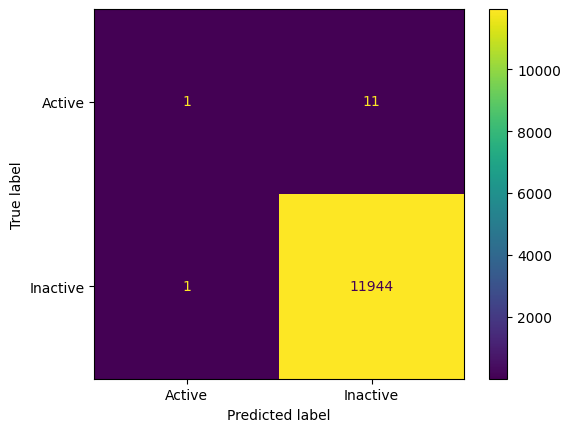

In [3]:
model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='not majority')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Random Forest not majority',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Số lượng mẫu sau khi tăng cường
- Tập huấn luyện: 95562
    Loại Inactive: 47781
    Loại Active  : 47781
              precision    recall  f1-score   support

           0       0.18      0.17      0.17        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.59      0.58      0.59     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.998410972652003
AUC: 0.7754918375889494


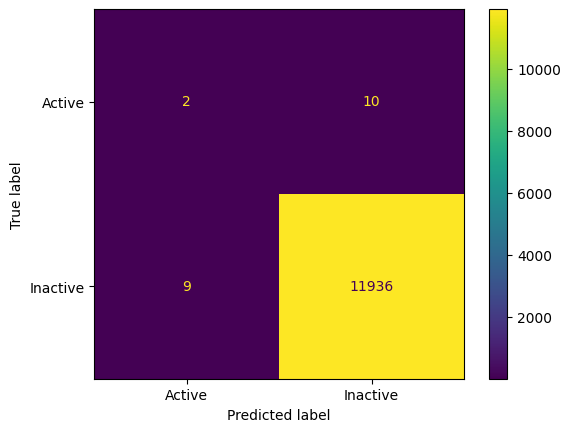

In [4]:
resampl = SMOTE(random_state=42)
X_train_resampl, y_train_resampl = resampl.fit_resample(X_train, y_train)

print( 'Số lượng mẫu sau khi tăng cường\n- Tập huấn luyện:',X_train_resampl.shape[0] )
print( '    Loại Inactive:',np.sum(y_train_resampl == 1) )
print( '    Loại Active  :',np.sum(y_train_resampl == 0) )

model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='not majority')
model.fit(X_train_resampl, y_train_resampl)

estimator,metric,npred = visualization('Balanced Random Forest not majority SMOTE',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Số lượng mẫu sau khi tăng cường
- Tập huấn luyện: 95562
    Loại Inactive: 47781
    Loại Active  : 47781
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.75      0.58      0.62     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989964037802125
AUC: 0.6602762662201758


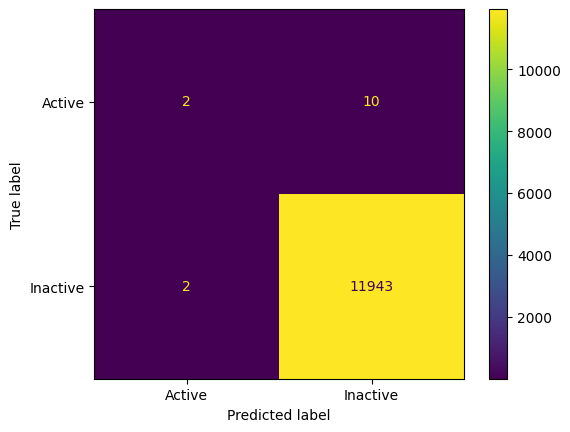

In [5]:
resampl = BorderlineSMOTE(random_state=42)
X_train_resampl, y_train_resampl = resampl.fit_resample(X_train, y_train)

print( 'Số lượng mẫu sau khi tăng cường\n- Tập huấn luyện:',X_train_resampl.shape[0] )
print( '    Loại Inactive:',np.sum(y_train_resampl == 1) )
print( '    Loại Active  :',np.sum(y_train_resampl == 0) )

model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='not majority')
model.fit(X_train_resampl, y_train_resampl)

estimator,metric,npred = visualization('Balanced Random Forest not majority Borderline-SMOTE',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Số lượng mẫu sau khi tăng cường
- Tập huấn luyện: 95562
    Loại Inactive: 47781
    Loại Active  : 47781
              precision    recall  f1-score   support

           0       0.18      0.17      0.17        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.59      0.58      0.59     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.998410972652003
AUC: 0.7754918375889494


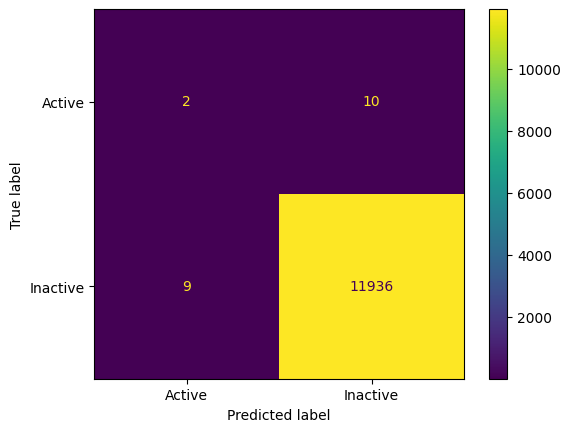

In [6]:
resampl = SMOTETomek(random_state=42)
X_train_resampl, y_train_resampl = resampl.fit_resample(X_train, y_train)

print( 'Số lượng mẫu sau khi tăng cường\n- Tập huấn luyện:',X_train_resampl.shape[0] )
print( '    Loại Inactive:',np.sum(y_train_resampl == 1) )
print( '    Loại Active  :',np.sum(y_train_resampl == 0) )

model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='not majority')
model.fit(X_train_resampl, y_train_resampl)

estimator,metric,npred = visualization('Balanced Random Forest not majority SMOTE Tomek',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Số lượng mẫu sau khi tăng cường
- Tập huấn luyện: 74081
    Loại Inactive: 47781
    Loại Active  : 26300
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.50      0.50      0.50     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9987455047252656
AUC: 0.7854716059718153


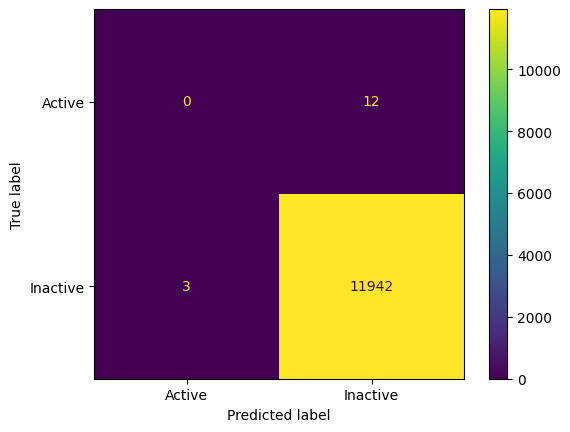

In [7]:
resampl = SVMSMOTE(random_state=42)
X_train_resampl, y_train_resampl = resampl.fit_resample(X_train, y_train)

print( 'Số lượng mẫu sau khi tăng cường\n- Tập huấn luyện:',X_train_resampl.shape[0] )
print( '    Loại Inactive:',np.sum(y_train_resampl == 1) )
print( '    Loại Active  :',np.sum(y_train_resampl == 0) )

model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='not majority')
model.fit(X_train_resampl, y_train_resampl)

estimator,metric,npred = visualization('Balanced Random Forest not majority SVM-SMOTE',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Số lượng mẫu sau khi tăng cường
- Tập huấn luyện: 95572
    Loại Inactive: 47781
    Loại Active  : 47791
              precision    recall  f1-score   support

           0       0.08      0.08      0.08        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.54      0.54      0.54     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9980764405787405
AUC: 0.7675038370308358


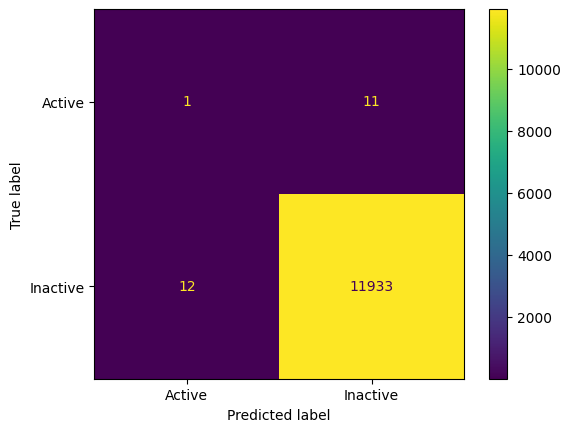

In [8]:
resampl = ADASYN(random_state=42,sampling_strategy='not majority')
X_train_resampl, y_train_resampl = resampl.fit_resample(X_train, y_train)

print( 'Số lượng mẫu sau khi tăng cường\n- Tập huấn luyện:',X_train_resampl.shape[0] )
print( '    Loại Inactive:',np.sum(y_train_resampl == 1) )
print( '    Loại Active  :',np.sum(y_train_resampl == 0) )

model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='not majority')
model.fit(X_train_resampl, y_train_resampl)

estimator,metric,npred = visualization('Balanced Random Forest not majority ADASYN',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

In [9]:
import csv
import os

filename = os.path.basename(path) + '_BRF_Not'
with open(filename + '.csv', "w") as file:
    writer = csv.writer(file, delimiter=",")
    writer.writerow(['Phương pháp tiếp cận','Precision','G-mean','AUC','Accuracy','Recall','F1-score','Active: Đoán đúng','Active: Đoán nhầm','Inactive: Đoán đúng','Inactive: Đoán nhầm'])
    for row in results:
        writer.writerow(row)
file.close()

df = pd.read_csv(filename + '.csv')
df.to_excel(filename + '.xlsx', index=False)